In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset


In [3]:
data = pd.read_csv('../data/synthetic_dataset.csv')  # Replace 'your_dataset.csv' with the actual filename or path


# Display the first few rows of the dataset to understand its structure


In [4]:
print(data.head())


   Transaction_ID  Transaction_Amount     Transaction_Date Transaction_Time  \
0               1            19122.08  2022-12-18 00:00:00         14:32:43   
1               2             2090.68  2022-02-24 00:00:00         07:58:38   
2               3             9247.22  2022-08-09 00:00:00         12:59:59   
3               4             7686.80  2022-12-22 00:00:00         00:20:42   
4               5             3693.87  2022-02-21 00:00:00         19:20:27   

   User_Account_ID Account_Creation_Date Payment_Method Billing_Location  \
0             6718   2022-05-04 00:00:00    Credit Card        Firozabad   
1              597   2022-11-16 00:00:00            UPI             Agra   
2             3068   2022-12-29 00:00:00    Credit Card        Faridabad   
3             3913   2022-02-14 00:00:00     Debit Card        Moradabad   
4             8675   2022-08-05 00:00:00     Debit Card           Ujjain   

  Shipping_Location Device_IP_Address Session_Duration  \
0         

# Summary statistics of numerical columns


In [5]:
print(data.describe())


       Transaction_ID  Transaction_Amount  User_Account_ID  \
count     10000.00000        10000.000000     10000.000000   
mean       5000.50000        12663.635398      5068.740800   
std        2886.89568        13600.861596      2839.033676   
min           1.00000          101.160000       100.000000   
25%        2500.75000         5249.712500      2616.750000   
50%        5000.50000        10582.200000      5073.000000   
75%        7500.25000        15826.530000      7492.250000   
max       10000.00000        99442.500000     10000.000000   

       Frequency_of_Transactions  Unusual_Time_of_Transaction  \
count               10000.000000                 10000.000000   
mean                    5.482700                     2.017100   
std                     2.876583                     1.420848   
min                     1.000000                     0.000000   
25%                     3.000000                     1.000000   
50%                     5.000000                   

# Information about the dataset


In [6]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               10000 non-null  int64  
 1   Transaction_Amount           10000 non-null  float64
 2   Transaction_Date             10000 non-null  object 
 3   Transaction_Time             10000 non-null  object 
 4   User_Account_ID              10000 non-null  int64  
 5   Account_Creation_Date        10000 non-null  object 
 6   Payment_Method               10000 non-null  object 
 7   Billing_Location             10000 non-null  object 
 8   Shipping_Location            10000 non-null  object 
 9   Device_IP_Address            10000 non-null  object 
 10  Session_Duration             10000 non-null  object 
 11  Frequency_of_Transactions    10000 non-null  int64  
 12  Time_Between_Transactions    10000 non-null  object 
 13  Unusual_Time_of_T

# Check for missing values


In [7]:
print(data.isnull().sum())


Transaction_ID                 0
Transaction_Amount             0
Transaction_Date               0
Transaction_Time               0
User_Account_ID                0
Account_Creation_Date          0
Payment_Method                 0
Billing_Location               0
Shipping_Location              0
Device_IP_Address              0
Session_Duration               0
Frequency_of_Transactions      0
Time_Between_Transactions      0
Unusual_Time_of_Transaction    0
Unusual_Transaction_Amounts    0
IP_Address_History             0
Fraud_Label                    0
dtype: int64


# Visualize the distribution of Transaction_Amount


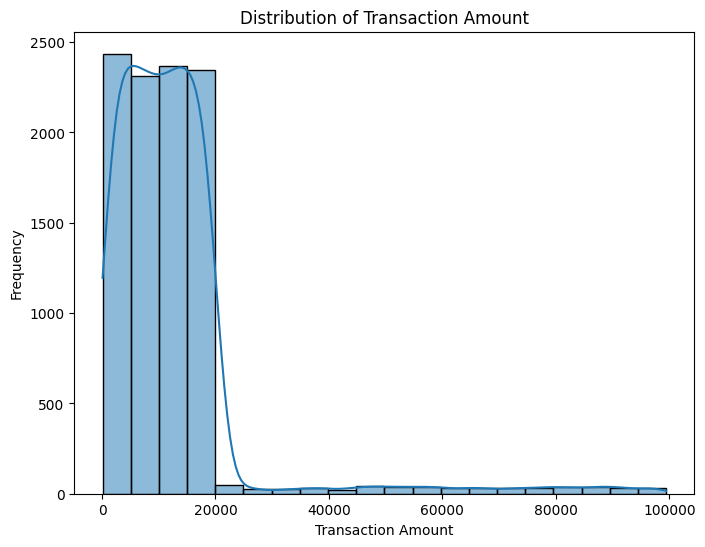

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Transaction_Amount'], bins=20, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix heatmap


['Credit Card' 'UPI' 'Debit Card']


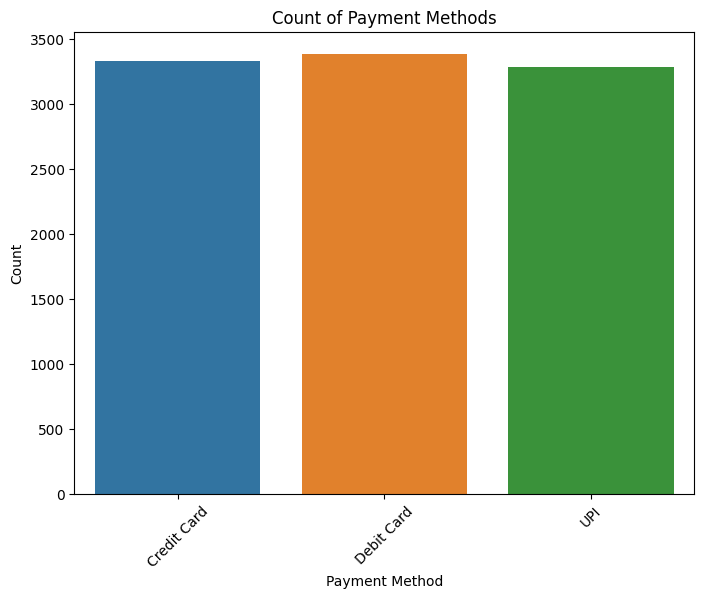

In [9]:
print(data['Payment_Method'].unique())

# Convert 'Payment_Method' column to categorical
data['Payment_Method'] = data['Payment_Method'].astype('category')

# Countplot of Payment_Method
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Payment_Method')
plt.title('Count of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

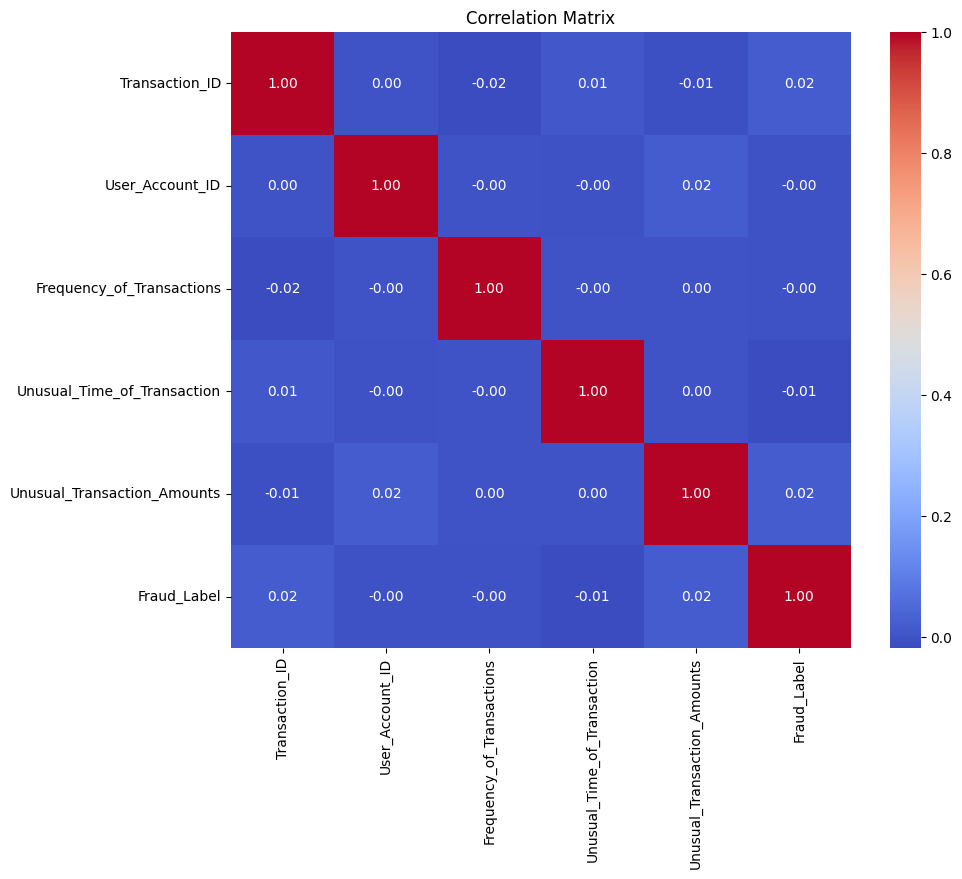

In [10]:
# Correlation matrix heatmap for numeric columns
numeric_cols = data.select_dtypes(include=['int32','int64'] ).columns.tolist()
correlation_matrix = data[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

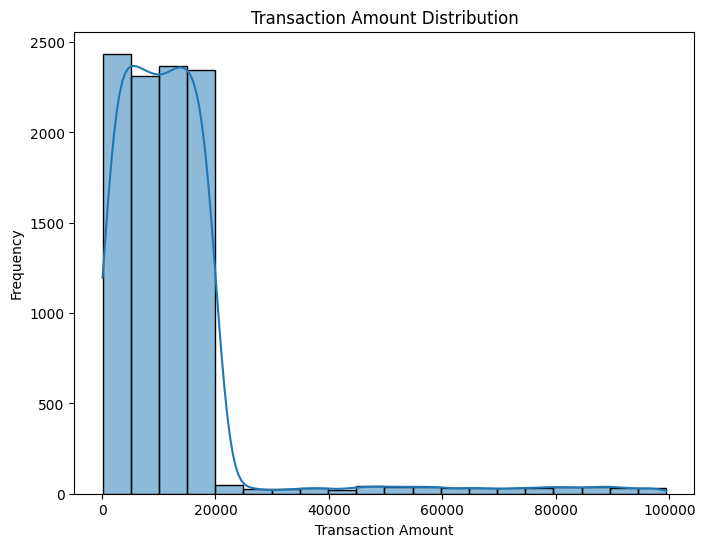

In [11]:
# Transaction_Amount distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Transaction_Amount'], bins=20, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

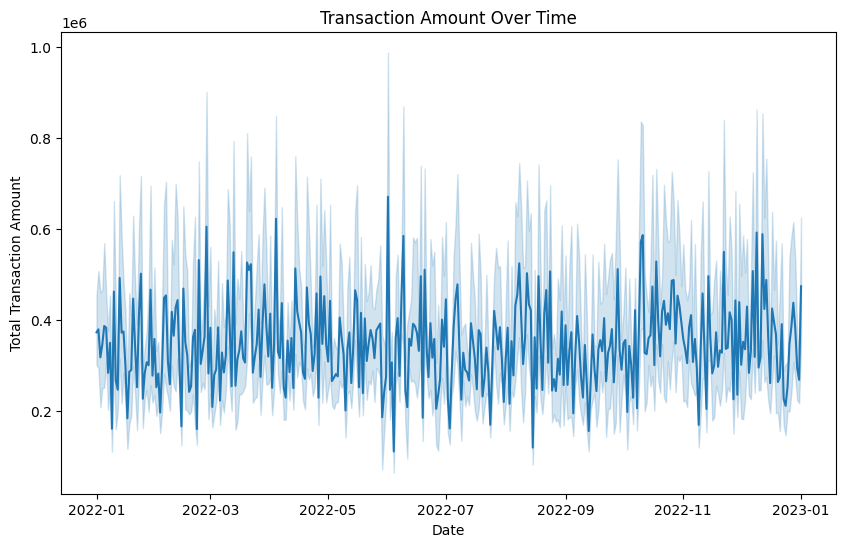

In [12]:
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])
data['Account_Creation_Date'] = pd.to_datetime(data['Account_Creation_Date'])

plt.figure(figsize=(10, 6))
sns.lineplot(x='Transaction_Date', y='Transaction_Amount', data=data, estimator='sum')
plt.title('Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.show()

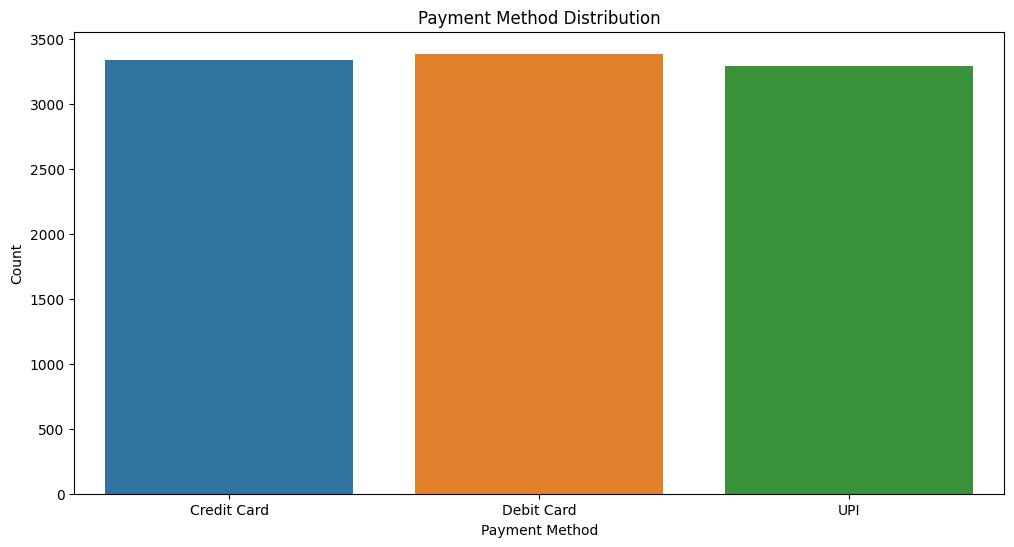

In [13]:
# Payment_Method, Billing_Location, Shipping_Location
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_Method', data=data)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

C:\Users\Yash\AppData\Local\Temp\ipykernel_11340\3679378354.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Transaction_Time'] = pd.to_datetime(data['Transaction_Time'])


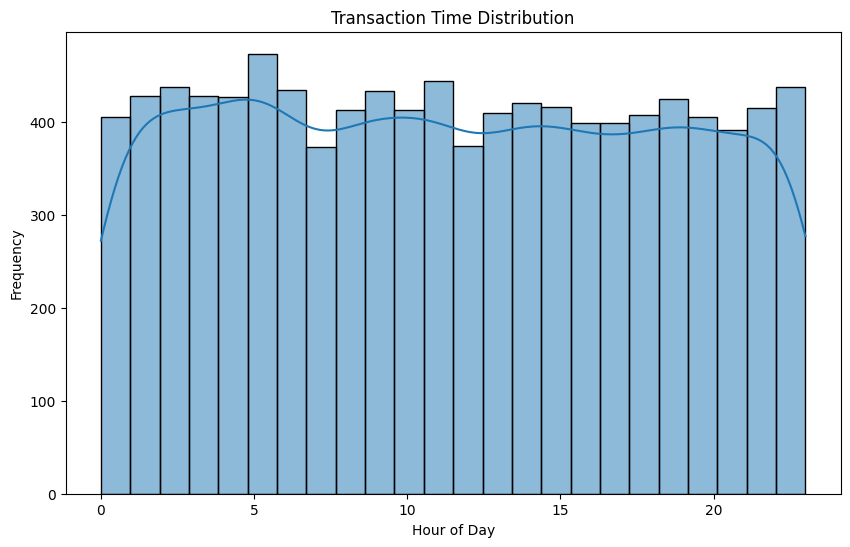

In [14]:
# Transaction Time distribution
data['Transaction_Time'] = pd.to_datetime(data['Transaction_Time'])
plt.figure(figsize=(10, 6))
sns.histplot(data['Transaction_Time'].dt.hour, bins=24, kde=True)
plt.title('Transaction Time Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

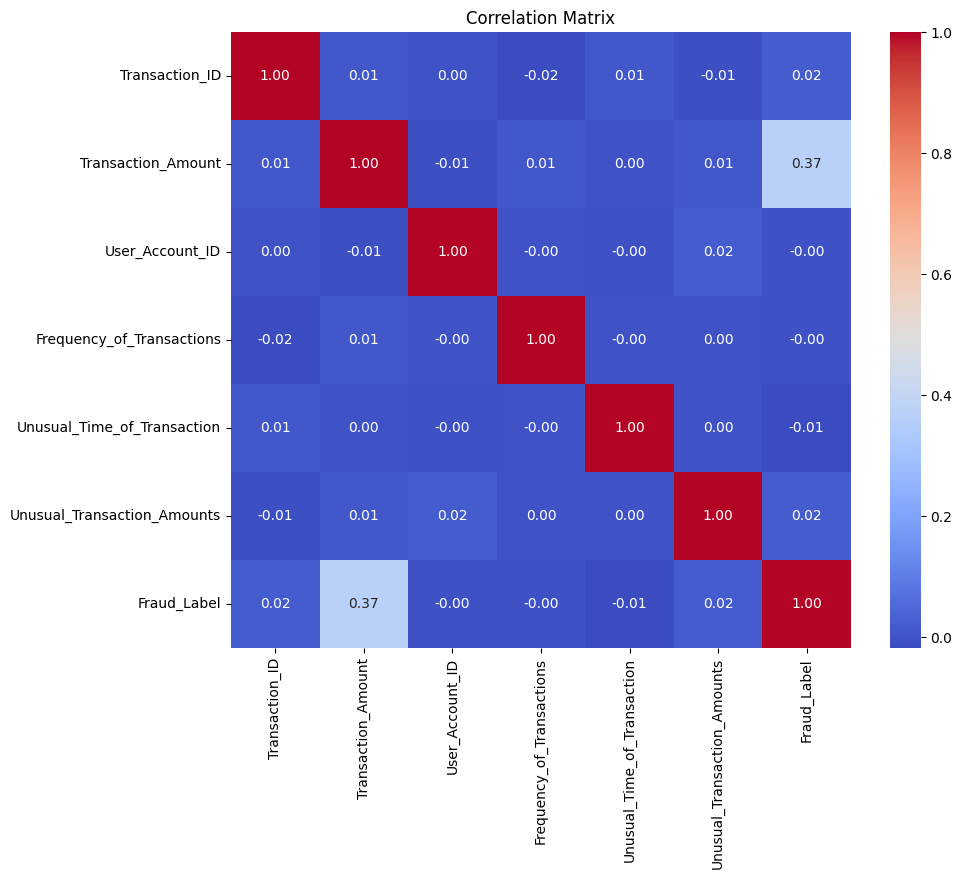

In [15]:
# Correlation Matrix (for numeric data)
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

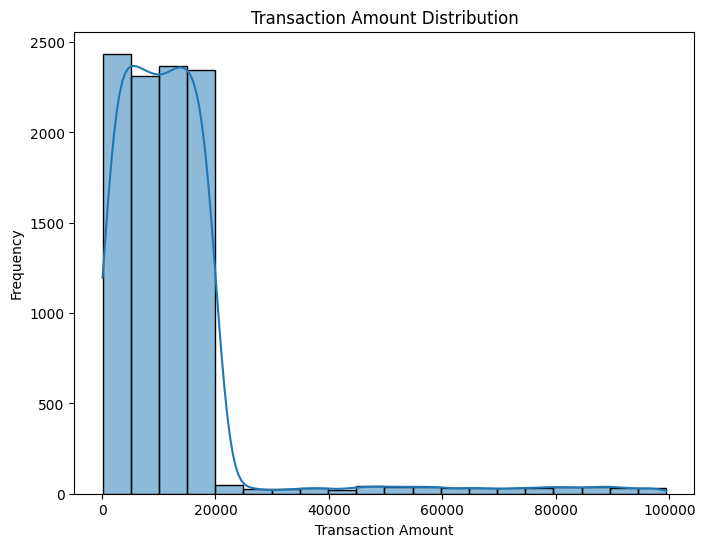

In [16]:
# Transaction_Amount distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Transaction_Amount'], bins=20, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

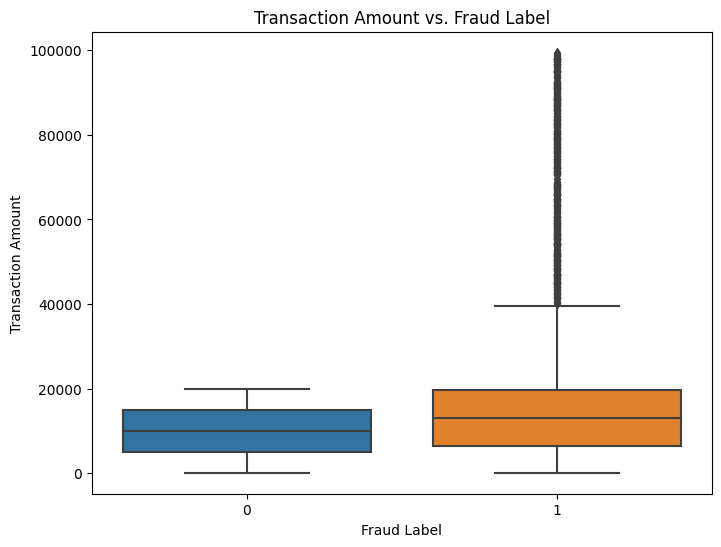

In [17]:
# Boxplot for Transaction_Amount and Fraud_Label
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fraud_Label', y='Transaction_Amount', data=data)
plt.title('Transaction Amount vs. Fraud Label')
plt.xlabel('Fraud Label')
plt.ylabel('Transaction Amount')
plt.show()


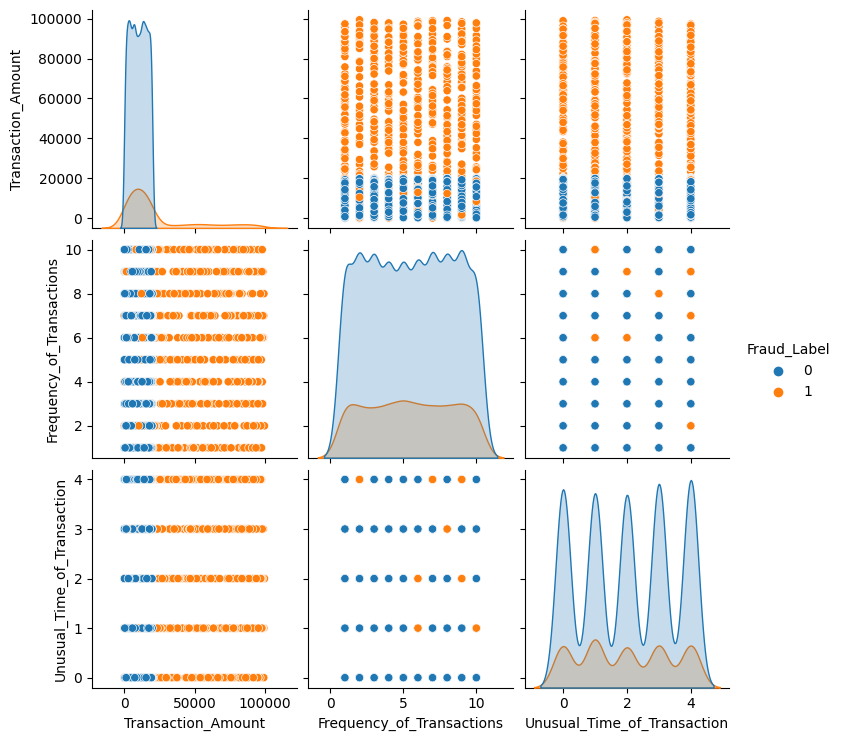

In [18]:
# Pairplot for numeric columns
sns.pairplot(data=data, vars=['Transaction_Amount', 'Frequency_of_Transactions', 'Unusual_Time_of_Transaction'], hue='Fraud_Label')
plt.show()

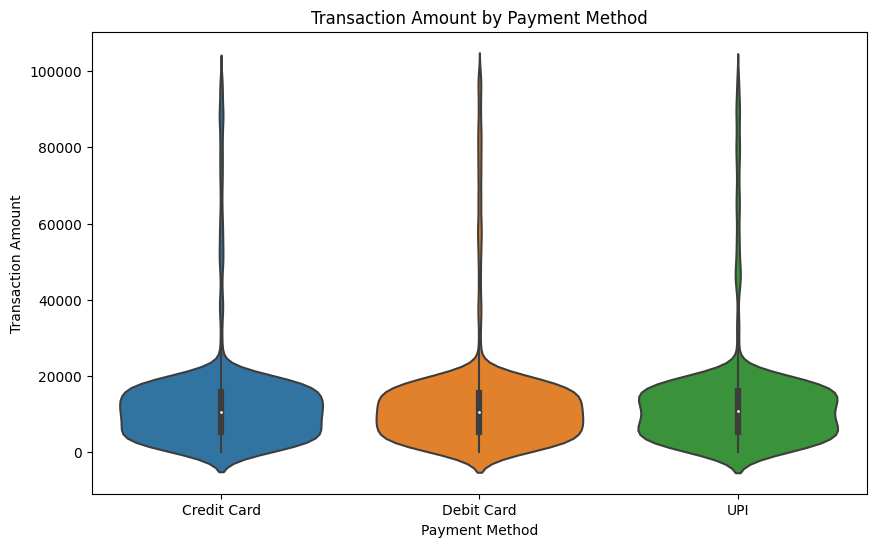

In [19]:
# Violin or Boxplot for Transaction Amount by Payment Method
plt.figure(figsize=(10, 6))
sns.violinplot(x='Payment_Method', y='Transaction_Amount', data=data)
plt.title('Transaction Amount by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Transaction Amount')
plt.show()

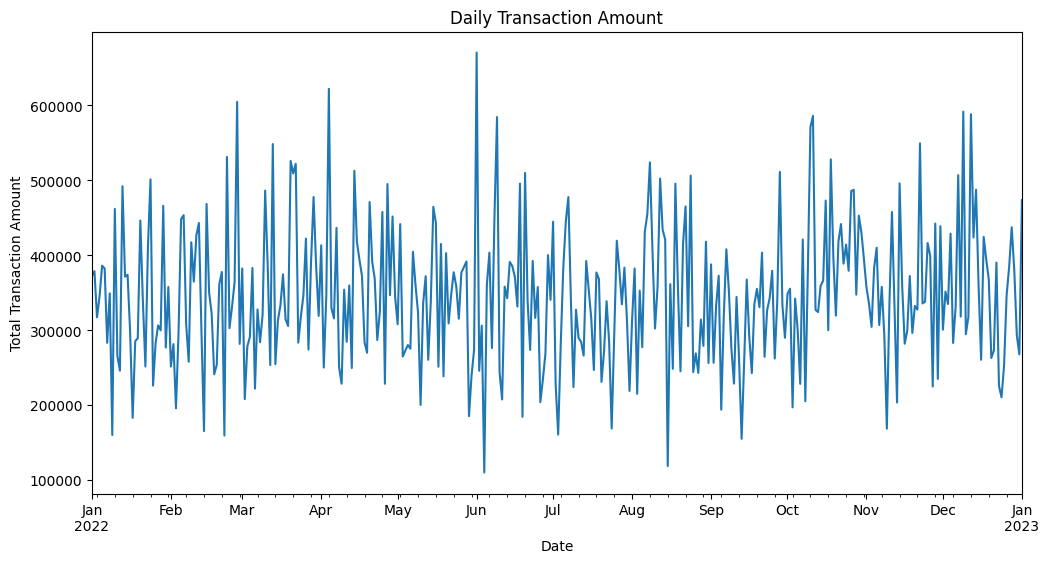

In [20]:
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])
daily_transactions = data.set_index('Transaction_Date')['Transaction_Amount'].resample('D').sum()
plt.figure(figsize=(12, 6))
daily_transactions.plot()
plt.title('Daily Transaction Amount')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.show()

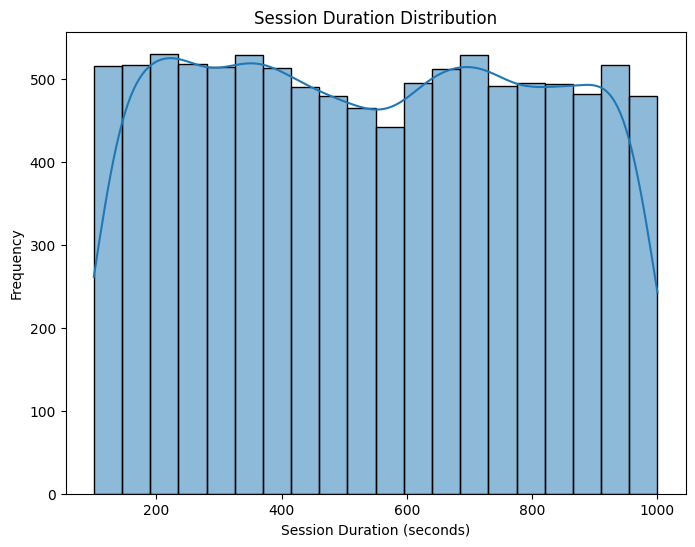

In [21]:
data['Session_Duration'] = data['Session_Duration'].str.replace('seconds', '').astype(int)
plt.figure(figsize=(8, 6))
sns.histplot(data['Session_Duration'], bins=20, kde=True)
plt.title('Session Duration Distribution')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

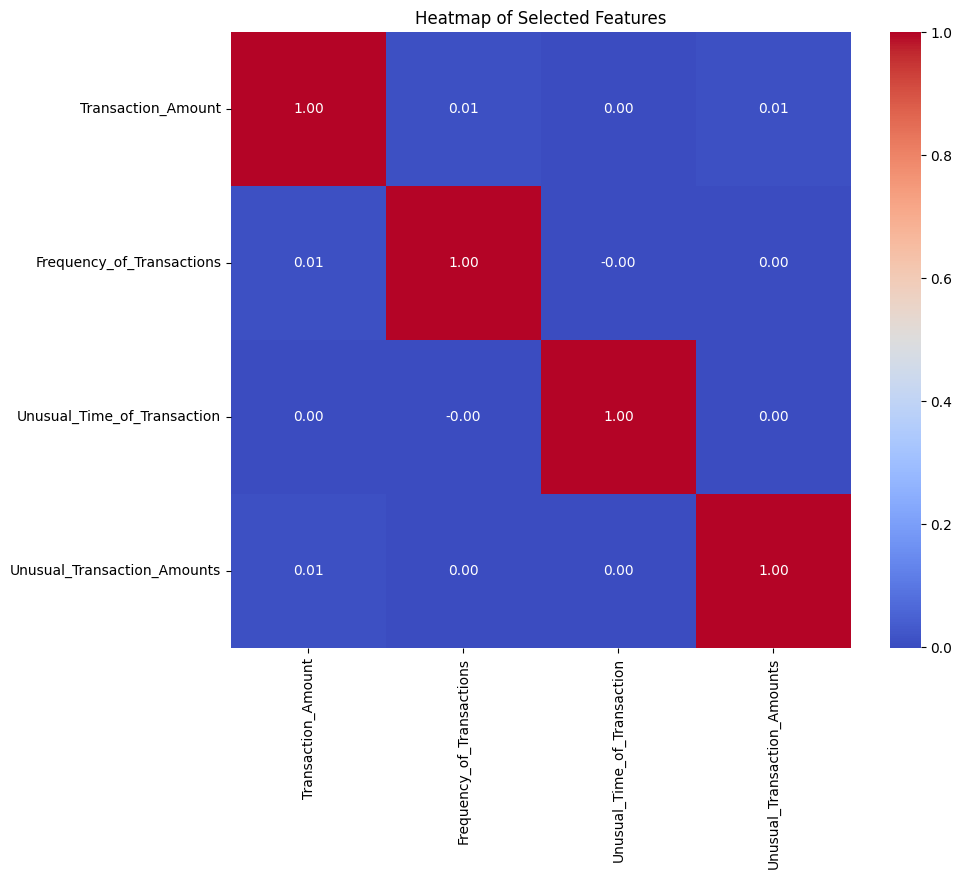

In [22]:
selected_features = ['Transaction_Amount', 'Frequency_of_Transactions', 'Unusual_Time_of_Transaction', 'Unusual_Transaction_Amounts']
plt.figure(figsize=(10, 8))
sns.heatmap(data[selected_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Selected Features')
plt.show()

In [23]:
! pip install wordcloud


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


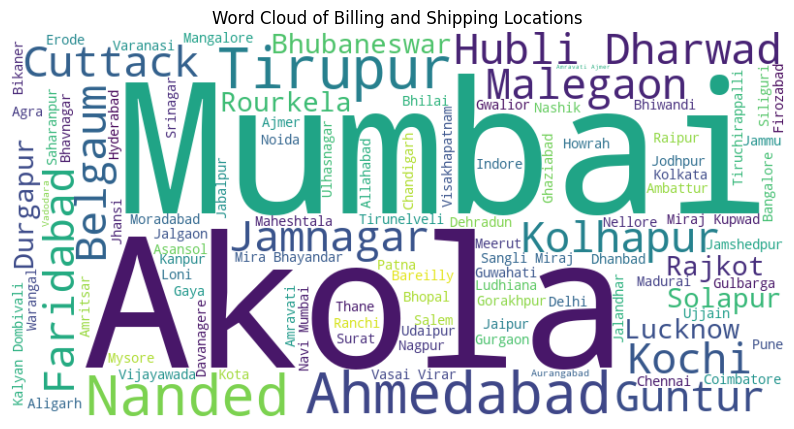

In [24]:
from wordcloud import WordCloud

# Combine Billing_Location and Shipping_Location columns into one text
locations_text = ' '.join(data['Billing_Location'].tolist() + data['Shipping_Location'].tolist())

# Generate Word Cloud for locations
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(locations_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Billing and Shipping Locations')
plt.show()


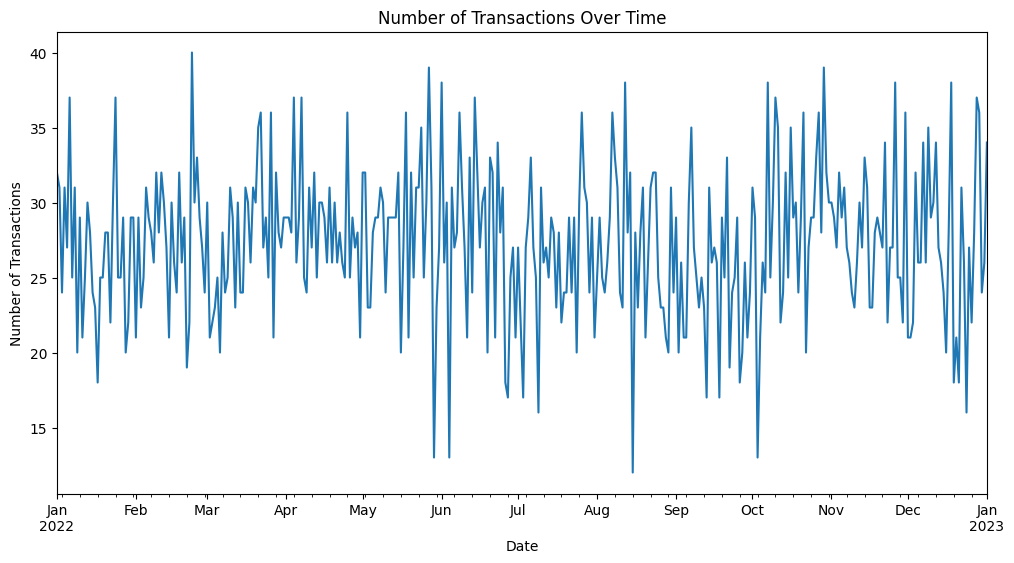

In [25]:
# Frequency of transactions over time
transactions_count = data.groupby('Transaction_Date').size()
plt.figure(figsize=(12, 6))
transactions_count.plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

In [26]:
transaction_amount_quartiles = data['Transaction_Amount'].quantile([0.25, 0.5, 0.75])
print("Transaction Amount Quartiles:")
print(transaction_amount_quartiles)

Transaction Amount Quartiles:
0.25     5249.7125
0.50    10582.2000
0.75    15826.5300
Name: Transaction_Amount, dtype: float64


In [27]:
# Calculate IQR for Transaction_Amount column
Q1 = data['Transaction_Amount'].quantile(0.25)
Q3 = data['Transaction_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Set upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the IQR method
outliers_iqr = data[(data['Transaction_Amount'] < lower_bound) | (data['Transaction_Amount'] > upper_bound)]

# Display outliers using IQR method
print("Outliers detected using IQR method:")
print(outliers_iqr)


Outliers detected using IQR method:
      Transaction_ID  Transaction_Amount Transaction_Date    Transaction_Time  \
9                 10            42606.33       2022-09-15 2023-11-15 03:13:37   
22                23            35735.94       2022-05-16 2023-11-15 04:59:36   
30                31            55052.61       2022-09-28 2023-11-15 08:55:10   
37                38            37990.17       2022-04-12 2023-11-15 09:35:49   
75                76            88069.48       2022-04-27 2023-11-15 03:55:11   
...              ...                 ...              ...                 ...   
9899            9900            56236.18       2022-07-01 2023-11-15 13:17:37   
9914            9915            47038.69       2022-02-27 2023-11-15 16:18:42   
9926            9927            36906.39       2022-03-16 2023-11-15 11:52:22   
9945            9946            77424.33       2022-09-04 2023-11-15 14:41:52   
9962            9963            46112.67       2022-10-18 2023-11-15 03:5